In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### data load

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num =", mnist.train.num_examples,
     ", test.num =", mnist.test.num_examples,
     ", validation.num =", mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

train.num = 55000 , test.num = 10000 , validation.num = 5000


### shape 및 type(mnist) 확인

In [3]:
print("type(mnist) = ", type(mnist), 
      ", type(mnist.train.images) = ", type(mnist.train.images), 
      ", type(mnist.train.labels) = ", type(mnist.train.labels))

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

print("\ntrain image shape = ", mnist.train.images.shape)
print("test image shape = ", mnist.test.images.shape)
print("validation image shape = ", mnist.validation.images.shape)

type(mnist) =  <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'> , type(mnist.train.images) =  <class 'numpy.ndarray'> , type(mnist.train.labels) =  <class 'numpy.ndarray'>

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)

train image shape =  (55000, 784)
test image shape =  (10000, 784)
validation image shape =  (5000, 784)


### 정규화 여부 확인

In [4]:
# 정규화 확인
print("length of mnist.train.images = ", len(mnist.train.images))

for index in range(len(mnist.train.images)):
    
    min_val = np.min(mnist.train.images[index])
    max_val = np.max(mnist.train.images[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break
    
print("")
print(mnist.train.images[0])  # 정규화 확인을 위한 테스트 출력

length of mnist.train.images =  55000

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

### one-hot encoding 여부 확인

In [5]:
# one-hot encoding 확인
print("length of mnist.train.images = ", len(mnist.train.labels))

for index in range(len(mnist.train.labels)):
    
    min_val = np.min(mnist.train.labels[index])
    max_val = np.max(mnist.train.labels[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break
    
print("")
print(mnist.train.labels[0])  # one-hot encoding 확인을 위한 테스트 출력

length of mnist.train.images =  55000

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### hyper parameter 설정

In [6]:
learning_rate = 1e-1
epochs = 50
batch_size = 100

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

In [7]:
X = tf.placeholder(tf.float32, [None, input_nodes])  
T = tf.placeholder(tf.float32, [None, output_nodes])  

W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))  # 은닉층 1가중치 노드
b2 = tf.Variable(tf.random_normal([hidden_nodes]))               # 은닉층 1바이어스 노드

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes])) # 출력층 가중치 노드
b3 = tf.Variable(tf.random_normal([output_nodes]))               # 출력층 바이어스 노드

In [8]:
Z2 = tf.matmul(X, W2) + b2
A2 = tf.nn.relu(Z2)

Z3 = logits = tf.matmul(A2, W3) + b3

y = A3 = tf.nn.softmax(Z3)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z3, labels = T))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.equal(tf.argmax(A3, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

predicted_list = tf.argmax(A3, 1)

In [11]:
index_label_false_list_1 = []
index_label_false_list_2 = []

with tf.Session() as sess:  # with를 쓰면 close 하지 않아도 됨
    sess.run(tf.global_variables_initializer())  # 변수 노드 (tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for step in range(total_batch):
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    # Accuracy 확인
    test_x_data = mnist.test.images
    test_t_data = mnist.test.labels
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy =", accuracy_val)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_1.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_1", len(index_label_false_list_1))
    
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_2.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_2", len(index_label_false_list_2))

epochs =  0 , step =  0 , loss_val =  110.51482
epochs =  0 , step =  100 , loss_val =  6.6810265
epochs =  0 , step =  200 , loss_val =  2.5267076
epochs =  0 , step =  300 , loss_val =  1.5641181
epochs =  0 , step =  400 , loss_val =  1.8561412
epochs =  0 , step =  500 , loss_val =  2.5793672
epochs =  1 , step =  0 , loss_val =  1.9439887
epochs =  1 , step =  100 , loss_val =  1.7594018
epochs =  1 , step =  200 , loss_val =  1.1566716
epochs =  1 , step =  300 , loss_val =  1.4990185
epochs =  1 , step =  400 , loss_val =  1.0752435
epochs =  1 , step =  500 , loss_val =  0.94328904
epochs =  2 , step =  0 , loss_val =  0.3657356
epochs =  2 , step =  100 , loss_val =  0.79073244
epochs =  2 , step =  200 , loss_val =  0.74805045
epochs =  2 , step =  300 , loss_val =  1.0967582
epochs =  2 , step =  400 , loss_val =  0.6143054
epochs =  2 , step =  500 , loss_val =  0.264339
epochs =  3 , step =  0 , loss_val =  0.70574
epochs =  3 , step =  100 , loss_val =  0.4885299
epochs =

epochs =  27 , step =  0 , loss_val =  0.06839944
epochs =  27 , step =  100 , loss_val =  0.09359114
epochs =  27 , step =  200 , loss_val =  0.18061602
epochs =  27 , step =  300 , loss_val =  0.20323673
epochs =  27 , step =  400 , loss_val =  0.13204506
epochs =  27 , step =  500 , loss_val =  0.22526951
epochs =  28 , step =  0 , loss_val =  0.16242339
epochs =  28 , step =  100 , loss_val =  0.22575755
epochs =  28 , step =  200 , loss_val =  0.19983794
epochs =  28 , step =  300 , loss_val =  0.21777904
epochs =  28 , step =  400 , loss_val =  0.28066787
epochs =  28 , step =  500 , loss_val =  0.2328795
epochs =  29 , step =  0 , loss_val =  0.09686224
epochs =  29 , step =  100 , loss_val =  0.13821733
epochs =  29 , step =  200 , loss_val =  0.11468318
epochs =  29 , step =  300 , loss_val =  0.19488902
epochs =  29 , step =  400 , loss_val =  0.20409243
epochs =  29 , step =  500 , loss_val =  0.16167486
epochs =  30 , step =  0 , loss_val =  0.04440069
epochs =  30 , step =

In [12]:
print(index_label_false_list_1)

[[7, 9, 3], [8, 5, 9], [66, 6, 7], [77, 2, 1], [149, 2, 8], [241, 9, 8], [247, 4, 2], [268, 8, 9], [289, 5, 8], [300, 4, 1], [303, 2, 7], [320, 9, 7], [321, 2, 7], [340, 5, 3], [341, 6, 4], [362, 2, 7], [386, 6, 5], [389, 9, 4], [445, 6, 0], [447, 4, 9], [449, 3, 5], [478, 5, 4], [479, 9, 5], [495, 8, 2], [507, 3, 5], [528, 3, 2], [551, 7, 3], [582, 8, 2], [613, 2, 8], [619, 1, 8], [654, 5, 8], [659, 2, 8], [685, 8, 5], [691, 8, 4], [717, 0, 7], [723, 0, 5], [774, 4, 9], [813, 9, 8], [830, 2, 4], [839, 8, 3], [866, 5, 4], [877, 8, 2], [882, 9, 7], [896, 0, 2], [900, 1, 3], [924, 2, 7], [938, 3, 5], [939, 2, 8], [947, 8, 9], [951, 5, 7], [965, 6, 5], [975, 2, 3], [982, 3, 2], [992, 9, 7], [1003, 5, 3], [1012, 7, 9], [1014, 6, 5], [1017, 6, 2], [1032, 5, 8], [1039, 7, 8], [1050, 2, 6], [1062, 3, 7], [1082, 5, 1], [1112, 4, 6], [1114, 3, 8], [1124, 8, 5], [1128, 3, 7], [1178, 4, 0], [1181, 6, 1], [1182, 6, 5], [1191, 0, 7], [1194, 7, 2], [1200, 8, 3], [1204, 3, 2], [1226, 7, 2], [1232, 9,

In [13]:
print(index_label_false_list_2)

[[7, 9, 3], [8, 5, 9], [66, 6, 7], [77, 2, 1], [149, 2, 8], [241, 9, 8], [247, 4, 2], [268, 8, 9], [289, 5, 8], [300, 4, 1], [303, 2, 7], [320, 9, 7], [321, 2, 7], [340, 5, 3], [341, 6, 4], [362, 2, 7], [386, 6, 5], [389, 9, 4], [445, 6, 0], [447, 4, 9], [449, 3, 5], [478, 5, 4], [479, 9, 5], [495, 8, 2], [507, 3, 5], [528, 3, 2], [551, 7, 3], [582, 8, 2], [613, 2, 8], [619, 1, 8], [654, 5, 8], [659, 2, 8], [685, 8, 5], [691, 8, 4], [717, 0, 7], [723, 0, 5], [774, 4, 9], [813, 9, 8], [830, 2, 4], [839, 8, 3], [866, 5, 4], [877, 8, 2], [882, 9, 7], [896, 0, 2], [900, 1, 3], [924, 2, 7], [938, 3, 5], [939, 2, 8], [947, 8, 9], [951, 5, 7], [965, 6, 5], [975, 2, 3], [982, 3, 2], [992, 9, 7], [1003, 5, 3], [1012, 7, 9], [1014, 6, 5], [1017, 6, 2], [1032, 5, 8], [1039, 7, 8], [1050, 2, 6], [1062, 3, 7], [1082, 5, 1], [1112, 4, 6], [1114, 3, 8], [1124, 8, 5], [1128, 3, 7], [1178, 4, 0], [1181, 6, 1], [1182, 6, 5], [1191, 0, 7], [1194, 7, 2], [1200, 8, 3], [1204, 3, 2], [1226, 7, 2], [1232, 9,

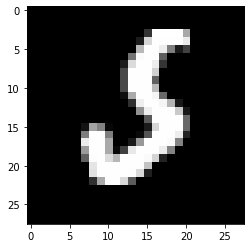

label =  5


In [14]:
# check false data
img = test_x_data[9982].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[9982]))

### 파일로 이미지 저장

In [17]:
# check false data
import os

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()
print(curr_dir)

C:\Users\YUSEUNG\OneDrive - konkuk.ac.kr\DESKTOP\AI 기본과정\실습\15일차_1123


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
100 image is saved now
110 image is saved now
120 image is saved now
130 image is saved now
140 image is saved now
150 image is saved now
160 image is saved now
170 image is saved now
180 image is saved now
190 image is saved now
200 image is saved now
210 image is saved now
220 image is saved now
230 image is saved now
240 image is saved now
250 image is saved now
260 image is saved now
270 image is saved now
280 image is saved now
290 image is saved now
300 image is saved now
310 image is saved now
320 image is saved now
330 image is saved now
340 image is saved now
350 image is saved now
360 image is saved now
370 image is saved now
380 image is saved now
390 image is saved now
400 image is saved now
410 image is saved now
420 image is saved now
430 image is saved now
440 image is saved n

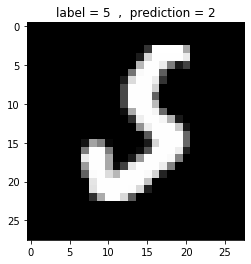

In [18]:
# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'false_data'
save_dir_name = algorithm_name + '_' + str(now.year) + str(now.month) + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.chdir(curr_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_false_list_2:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)